## FACE DETECTION : Viola-Jones Algorithm
#### Note: Not Face recognition

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nadia = cv2.imread('DATA/Nadia_Murad.jpg', 0)
denis = cv2.imread('DATA/Denis_Mukwege.jpg', 0)
solvay = cv2.imread('DATA/solvay_conference.jpg', 0)
bro = cv2.imread('DATA/Two.jpg', 0)
group = cv2.imread('DATA/Group_Pixelled.jpg', 0)
family = cv2.imread('DATA/Family_2.jpg', 0)

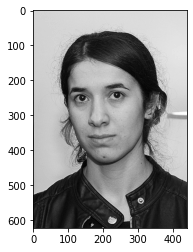

In [3]:
plt.imshow(nadia, cmap='gray')

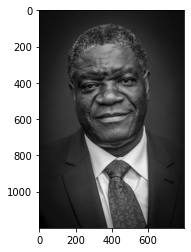

In [4]:
plt.imshow(denis, cmap='gray')

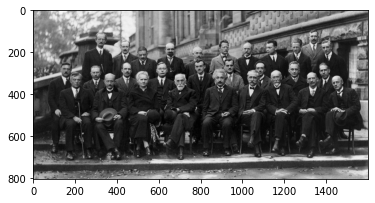

In [5]:
plt.imshow(solvay, cmap='gray')

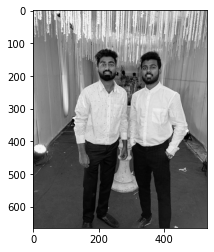

In [6]:
plt.imshow(bro, cmap='gray')

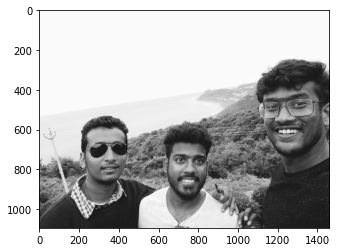

In [7]:
plt.imshow(group, cmap='gray')

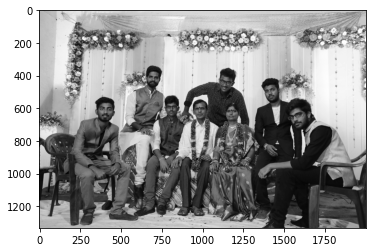

In [8]:
plt.imshow(family, cmap='gray')

## Importing Trained Dataset - Cascade Classifier

In [9]:
face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')
face_cascade                                     

<CascadeClassifier 000002B3034EA650>

In [10]:
#Function to detect a Face

def detect_face(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255), 10)
        
    return face_img

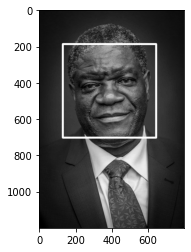

In [11]:
result = detect_face(denis)
plt.imshow(result, cmap='gray')

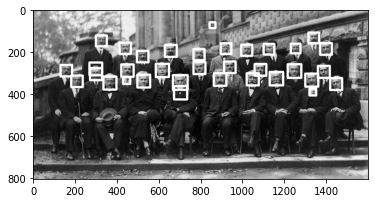

In [12]:
result = detect_face(solvay)
plt.imshow(result, cmap='gray')

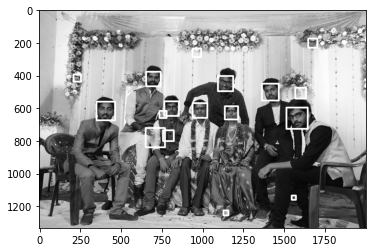

In [13]:
result = detect_face(family)
plt.imshow(result, cmap='gray')

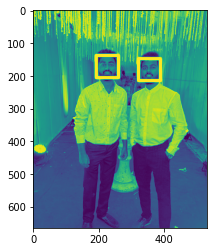

In [14]:
result = detect_face(bro)
plt.imshow(result)

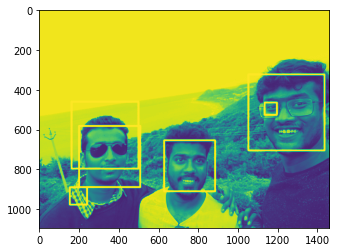

In [15]:
result = detect_face(group)
plt.imshow(result)

## So if we see there are other rectangles which detect other objects, so we add scale factors and minnimun neighbors

In [16]:
#Modified Function to detect a Face

def adj_detect_face(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255), 10)
        
    return face_img

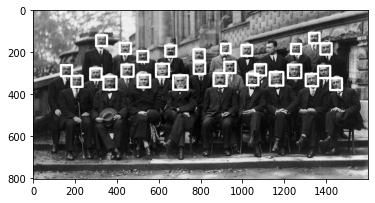

In [17]:
result = adj_detect_face(solvay)
plt.imshow(result, cmap='gray')

## EyeCascade Classifier

In [18]:
eye_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_eye.xml')

In [19]:
#Function to detect a Eye

def detect_eyes(img):
    
    face_img = img.copy()
    
    eye_rects = eye_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255), 10)
        
    return face_img

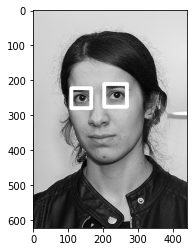

In [20]:
result = detect_eyes(nadia)
plt.imshow(result, cmap='gray')

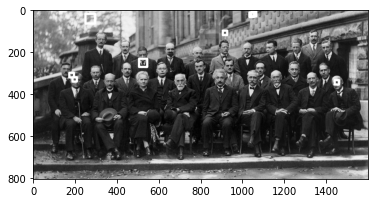

In [21]:
result = detect_eyes(solvay)
plt.imshow(result, cmap='gray')

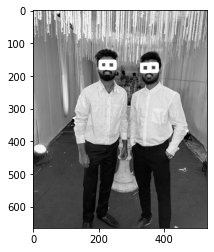

In [22]:
result = detect_eyes(bro)
plt.imshow(result, cmap='gray')

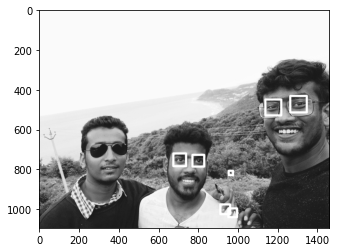

In [23]:
result = detect_eyes(group)
plt.imshow(result, cmap='gray')

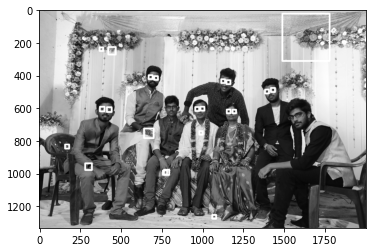

In [24]:
result = detect_eyes(family)
plt.imshow(result, cmap='gray')

In [25]:
#ModifiedFunction to detect a Eye

def adj_detect_eyes(img):
    
    face_img = img.copy()
    
    eye_rects = eye_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255), 10)
        
    return face_img

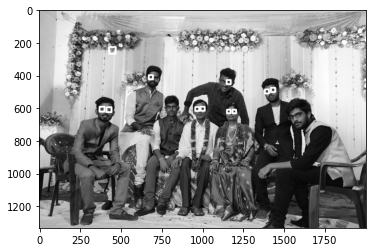

In [26]:
result = adj_detect_eyes(family)
plt.imshow(result, cmap='gray')

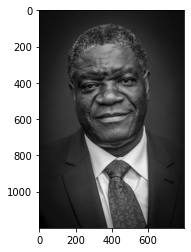

In [27]:
result = adj_detect_eyes(denis)
plt.imshow(result, cmap='gray')

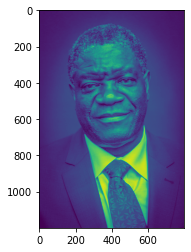

In [28]:
result = adj_detect_eyes(denis)
plt.imshow(result)

In [29]:
#Note: For above image it works on original photo as the eyes match the skin color, where the classifier excepts white background in the eye

## Face Detection using the WebCam

In [30]:
cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read(0)
    
    frame = detect_face(frame)
    
    cv2.imshow('Video Face Detect', frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()